In [69]:
import glob
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

### Use your own `caffe_root` directory below

In [4]:
import sys
caffe_root = '/home/psoulos/bin/caffe/'
sys.path.insert(0, caffe_root + 'python')
import caffe

In [5]:
model_dir = 'models/'
model_def = os.path.join(model_dir, 'deploy.prototxt')
model_weights = os.path.join(model_dir, 'alexnet_finetune_400k.caffemodel')

net = caffe.Net(model_def,
                model_weights,
                caffe.TEST)

In [6]:
# load the mean ImageNet image (as distributed with Caffe) for subtraction
mu = np.load('imagenet/ilsvrc_2012_mean.npy')
mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values
print 'mean-subtracted values:', zip('BGR', mu)

# create transformer for the input called 'data'
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

mean-subtracted values: [('B', 104.0069879317889), ('G', 116.66876761696767), ('R', 122.6789143406786)]


In [85]:
batch_size = 10
net.blobs['data'].reshape(batch_size,
                          3,
                          227, 227)

(120, 4096)
predicted class is: 367
4096


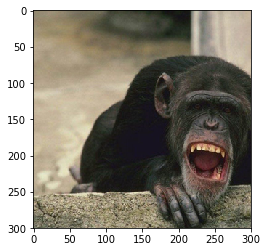

In [96]:
data_dir = 'data/'
filenames = glob.glob(os.path.join(data_dir, '*.png'))

layer = 'fc7'
representations = np.empty([len(filenames), net.blobs[layer].data.shape[1]])
print(representations.shape)

# TODO how do I deal with a last batch of smaller size?


images = caffe.io.load_image(os.path.join(data_dir, 'stim-0078.png'))
plt.imshow(image)
transformed_image = transformer.preprocess('data', image)
net.blobs['data'].data[...] = transformed_image

output = net.forward()
output_prob = output['prob'][0]  # the output probability vector for the first image in the batch


In [90]:
batches = len(filenames) / batch_size
for i in range(batches):
    # Load the images for the batch
    batch_filenames = filenames[i*batch_size:(i+1)*batch_size]
    for i, f in enumerate(batch_filenames):
        image = caffe.io.load_image(f)
        transformed_image = transformer.preprocess('data', image)
        net.blobs['data'].data[i, :, :, :] = transformed_image
        
    # Extract the representations
    net.forward()
    # CONTINUE
    
    
    

AttributeError: 'list' object has no attribute 'read'